In [246]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [247]:
im = Image.open("image/01_sample")
area = (0, 0, 210, 210)
im = im.crop(area)

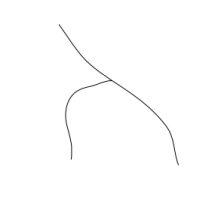

In [248]:
im

In [249]:
im_array = np.asarray(im.convert('L'))

In [250]:
# get start point
im_array < 200

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [251]:
x_start = np.where(np.sum(im_array<200, axis=0) != 0)[0][0]
y_start = np.where(np.sum(im_array<200, axis=1) != 0)[0][0]
start_point = (x_start, y_start)

In [252]:
im_array[24, 59]

161

In [253]:
h, w = im_array.shape
print(h, w)

210 210


In [254]:
sigma_range = [50, 100, 150, 200, 250, 300, 350]

Sigma:50


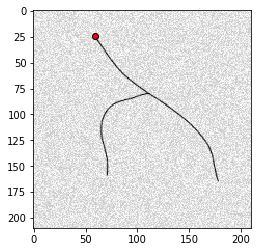

Sigma:100


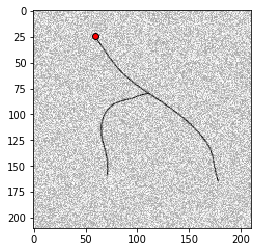

Sigma:150


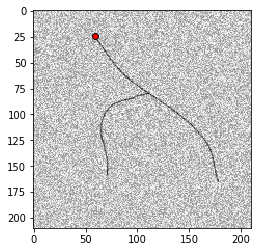

Sigma:200


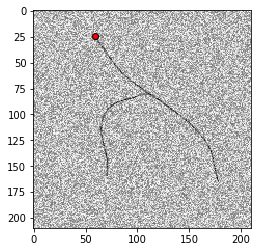

Sigma:250


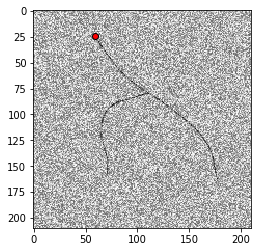

Sigma:300


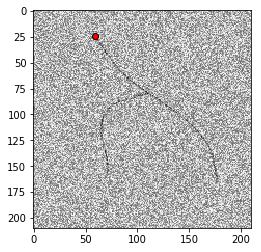

Sigma:350


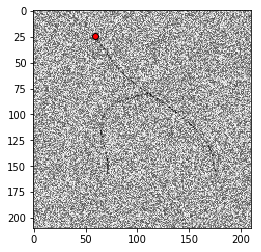

In [255]:
for sigma in sigma_range:
    print('Sigma:{}'.format(sigma))
    noisy = im_array + ((np.random.random((h, w))*sigma)//1).astype('int')
    plt.scatter(start_point[0], start_point[1], color='r', edgecolor='k')
    plt.imshow(noisy, cmap='gray')
    plt.show()

### Fast Marching as Seen in the course

In [203]:
from __future__ import division

In [204]:
neigh = np.array([[1, -1, 0, 0], [0, 0,  1, -1]])

In [205]:
n = 210

In [206]:
boundary = lambda x: np.mod(x,n)

In [207]:
ind2sub1 = lambda k: [int( (k-np.fmod(k,n))/n ), np.fmod(k,n)]
sub2ind1 = lambda u: int( u[0]*n + u[1] )
Neigh = lambda k,i: sub2ind1(boundary(ind2sub1(k) + neigh[:,i]))

In [208]:
W = np.ones((n,n))

In [209]:
x0 = [y_start, x_start]

In [210]:
I = [sub2ind1(x0)]

In [211]:
from math import inf

In [212]:
D = np.ones( (n,n) ) + inf
u = ind2sub1(I)
D[u[0],u[1]] = 0

In [213]:
S = np.zeros( (n,n) )
S[u[0],u[1]] = 1

In [214]:
extract   = lambda x,I: x[I]
extract1d = lambda x,I: extract(x.flatten(),I)

In [215]:
j = np.argsort( extract1d(D,I)  )
if np.ndim(j)==0:
    j = [j]   # make sure that j is a list a not a singleton
j = j[0]
i = I[j]         
a = I.pop(j)

In [216]:
u = ind2sub1(i);
S[u[0],u[1]] = -1

In [217]:
J = [] 
for k in np.arange(0,4):
    j = Neigh(i,k)
    if extract1d(S,j)!=-1:
        # add to the list of point to update
        J.append(j)           
        if extract1d(S,j)==0:
            # add to the front
            u = ind2sub1(j)
            S[u[0],u[1]] = 1
            I.append(j)

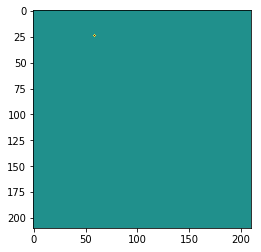

In [218]:
plt.imshow(S)
plt.show()

In [219]:
DNeigh = lambda D,k: extract1d(D,Neigh(j,k))
for j in J:
    dx = min(DNeigh(D,0), DNeigh(D,1))
    dy = min(DNeigh(D,2), DNeigh(D,3))
    u = ind2sub1(j)
    w = extract1d(W,j);
    D[u[0],u[1]] = min(dx + w, dy + w)

### Fast Marching:

In [280]:
n = 210

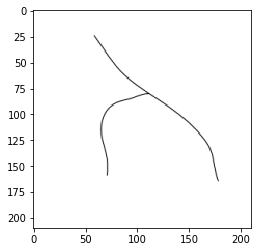

In [281]:
sigma = 0
noisy = im_array + ((np.random.random(im_array.shape)*sigma)//1).astype('int')

plt.imshow(noisy, cmap='gray')
plt.show()

In [282]:
W = noisy

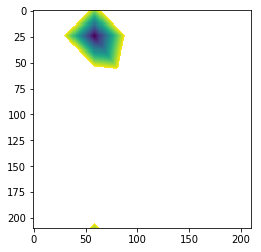

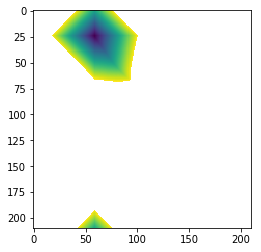

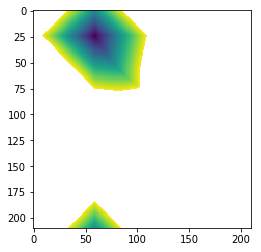

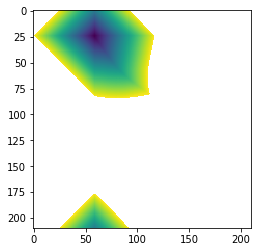

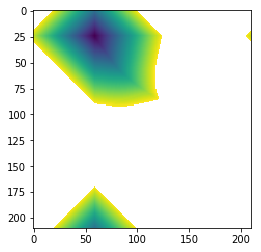

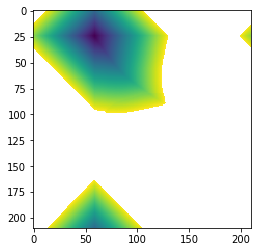

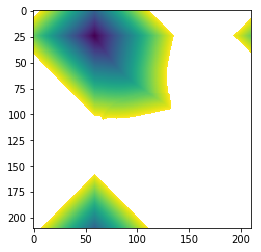

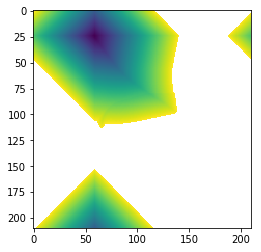

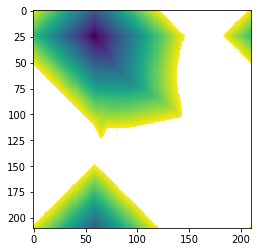

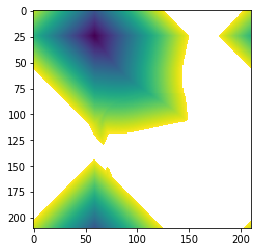

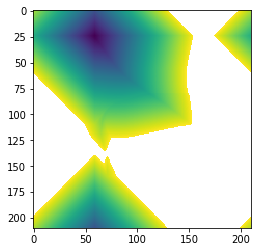

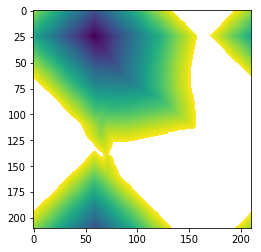

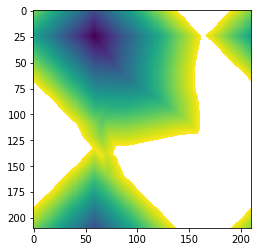

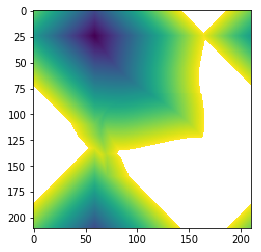

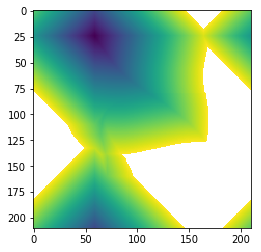

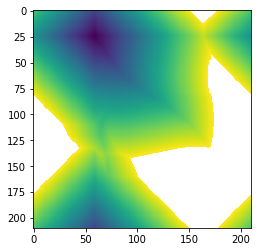

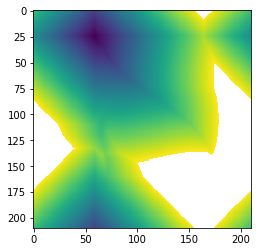

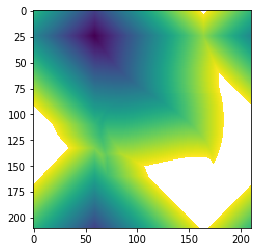

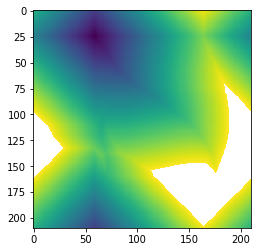

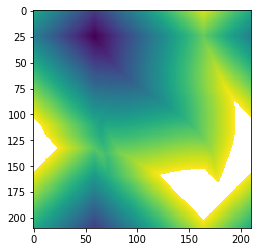

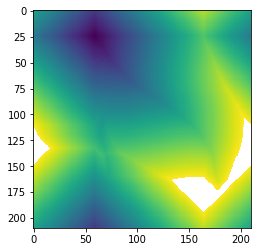

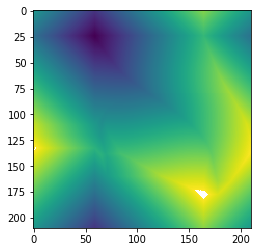

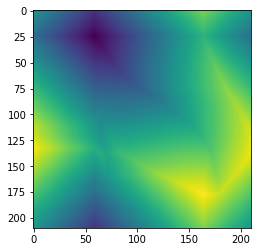

In [287]:
x0 = [y_start, x_start]
I = [sub2ind1(x0)]

D = np.ones((n,n)) + inf
u = ind2sub1(I)
D[u[0],u[1]] = 0

S = np.zeros((n,n))
S[u[0],u[1]] = 1

extract   = lambda x,I: x[I]
extract1d = lambda x,I: extract(x.flatten(),I)

count = 0

while I:
    
    count += 1
    
    j = np.argsort( extract1d(D,I)  )
    if np.ndim(j)==0:
        j = [j]   # make sure that j is a list a not a singleton
    j = j[0]
    i = I[j]         
    a = I.pop(j)
    
    u = ind2sub1(i);
    S[u[0],u[1]] = -1
    
    J = [] 
    for k in np.arange(0,4):
        j = Neigh(i,k)
        if extract1d(S,j)!=-1:
            # add to the list of point to update
            J.append(j)           
            if extract1d(S,j)==0:
                # add to the front
                u = ind2sub1(j)
                S[u[0],u[1]] = 1
                I.append(j)
                
    DNeigh = lambda D,k: extract1d(D,Neigh(j,k))
    for j in J:
        dx = min(DNeigh(D,0), DNeigh(D,1))
        dy = min(DNeigh(D,2), DNeigh(D,3))
        u = ind2sub1(j)
        w = extract1d(W,j);
        D[u[0],u[1]] = min(dx + w, dy + w)
    
    if count % 2000 == 0:
        plt.imshow(D)
        plt.show()
        
plt.imshow(D)
plt.show()

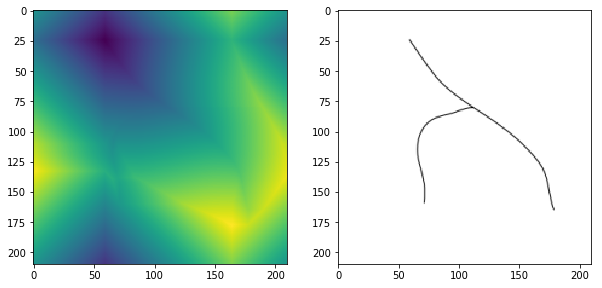

In [295]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(D)
plt.subplot(122)
plt.imshow(noisy, cmap='gray')
plt.show()